## 나이브 베이즈 분류
- 나이브 베이즈 분류 알고리즘은 데이터의 각 특징들이 서로 독립적일 것이라는 가정 하에 사용
- 스팸 메일과 정상 메일을 구분할 때 나이브 베이즈 분류 알고리즘이 유용한 이유도 둘 사이의 특징이 꽤 독립적이기 때문
- 각 특징들이 독립이라면 다른 분류 방식에 비해 결과가 좋고 학습 데이터도 적게 필요
- 각 특징들이 독립이 아니라면 즉, 특징들이 서로 영향을 미치면 분류 결과 신뢰성 하락
- 학습 데이터에 없는 범주의 데이터일 경우 정상적 예측 불가능

$
P(Y|X) = \frac{P(X|Y) * P(Y)}{P(X)}
$

- X = ‘확인’ 키워드 유무(O or X)
- Y = 메일 결과 (스팸 or 정상)

|   | 스팸 | 정상 | 개수 |
| --- | --- | --- | --- |
| “확인” | 5 | 2 | 7 |
| 나머지 | 3 | 10 | 13 |
| 개수 | 8 | 12 | 20 |

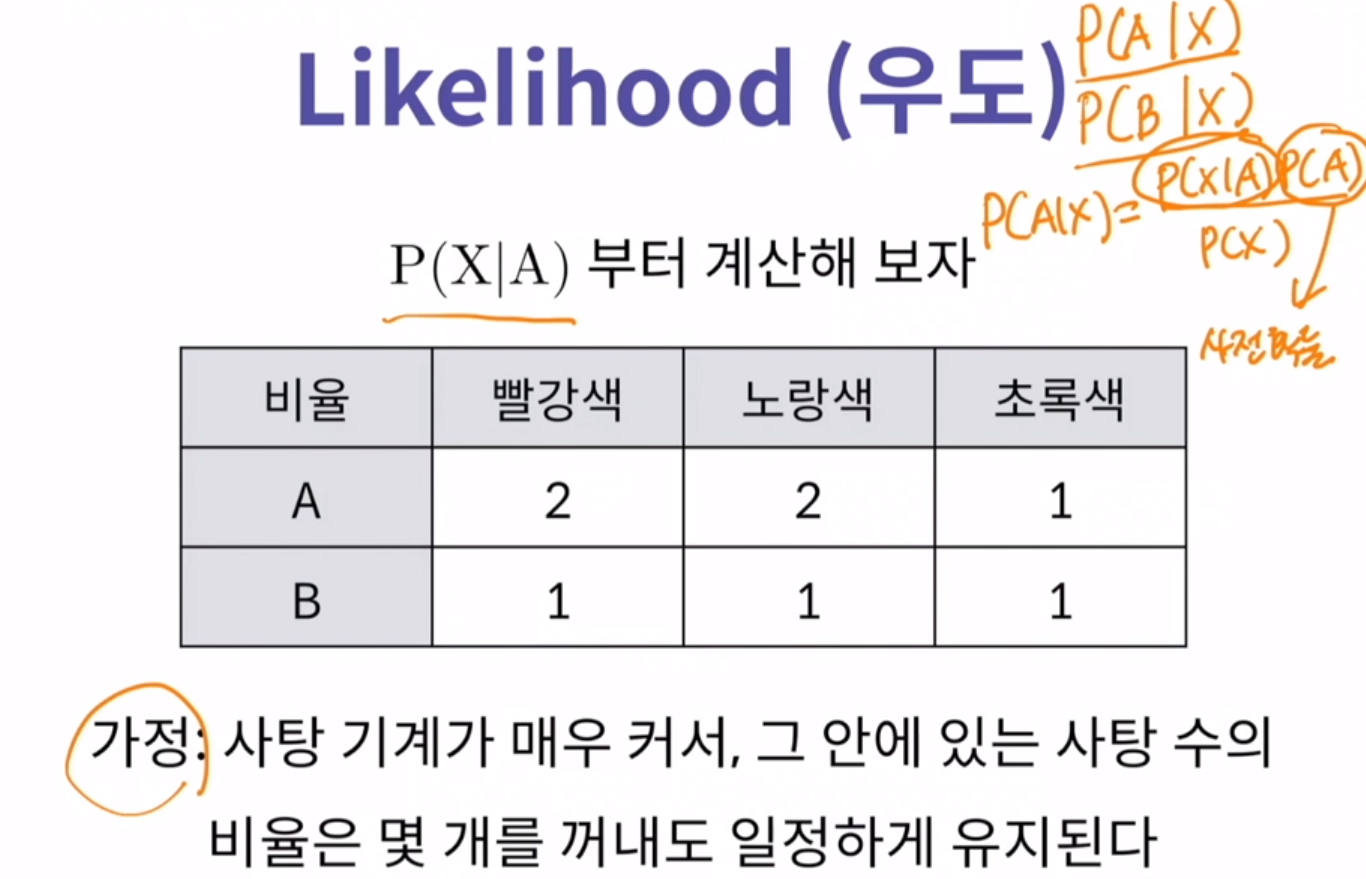

- 여기서 P(A)는 사전확률로 이미 정해져있는 값이다.

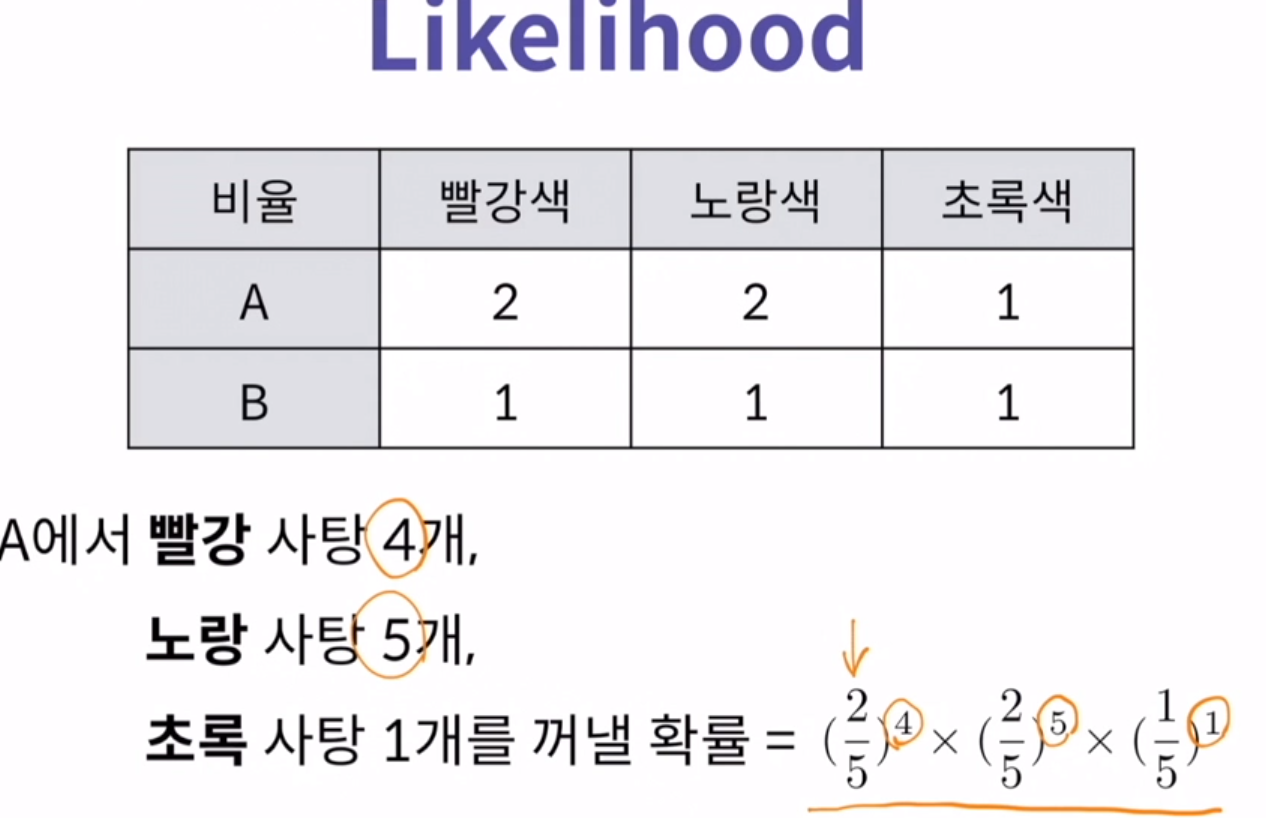

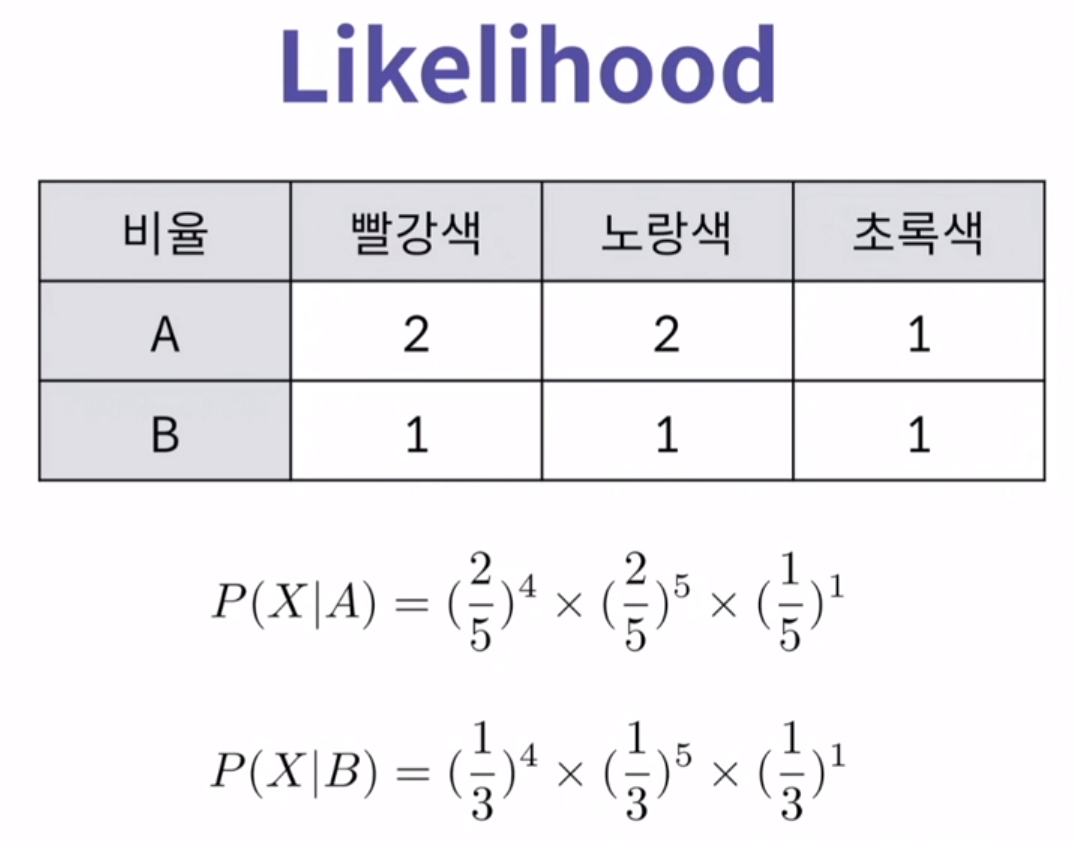

- 여기서 순서를 고려하려면 경우의수 C를 곱해줘야 하지만 P(X|A)와 P(X|B)의 비율을 구하는 것이므로 같은 값을 곱해줄 필요가 없기 때문에 무시해도 된다.
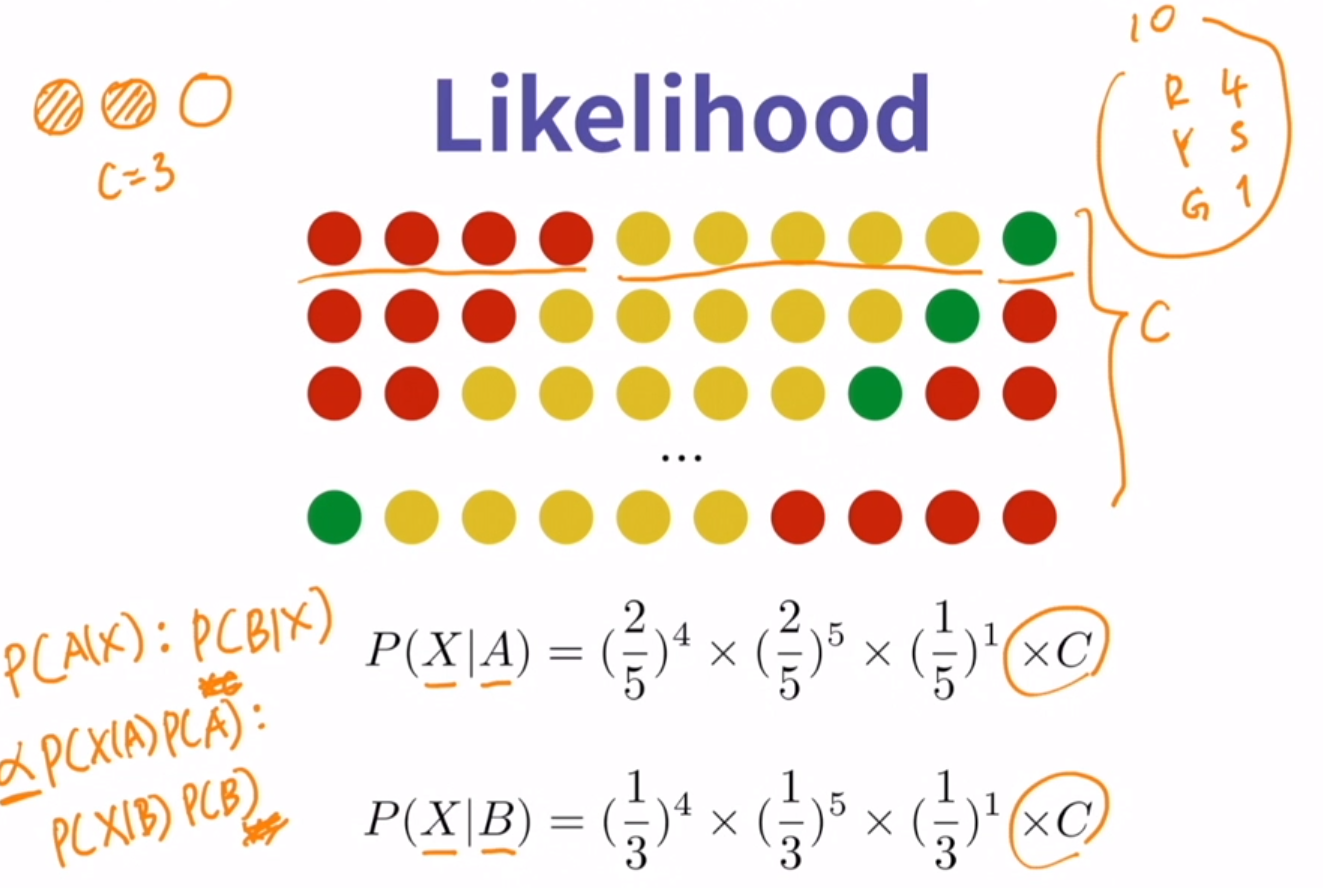

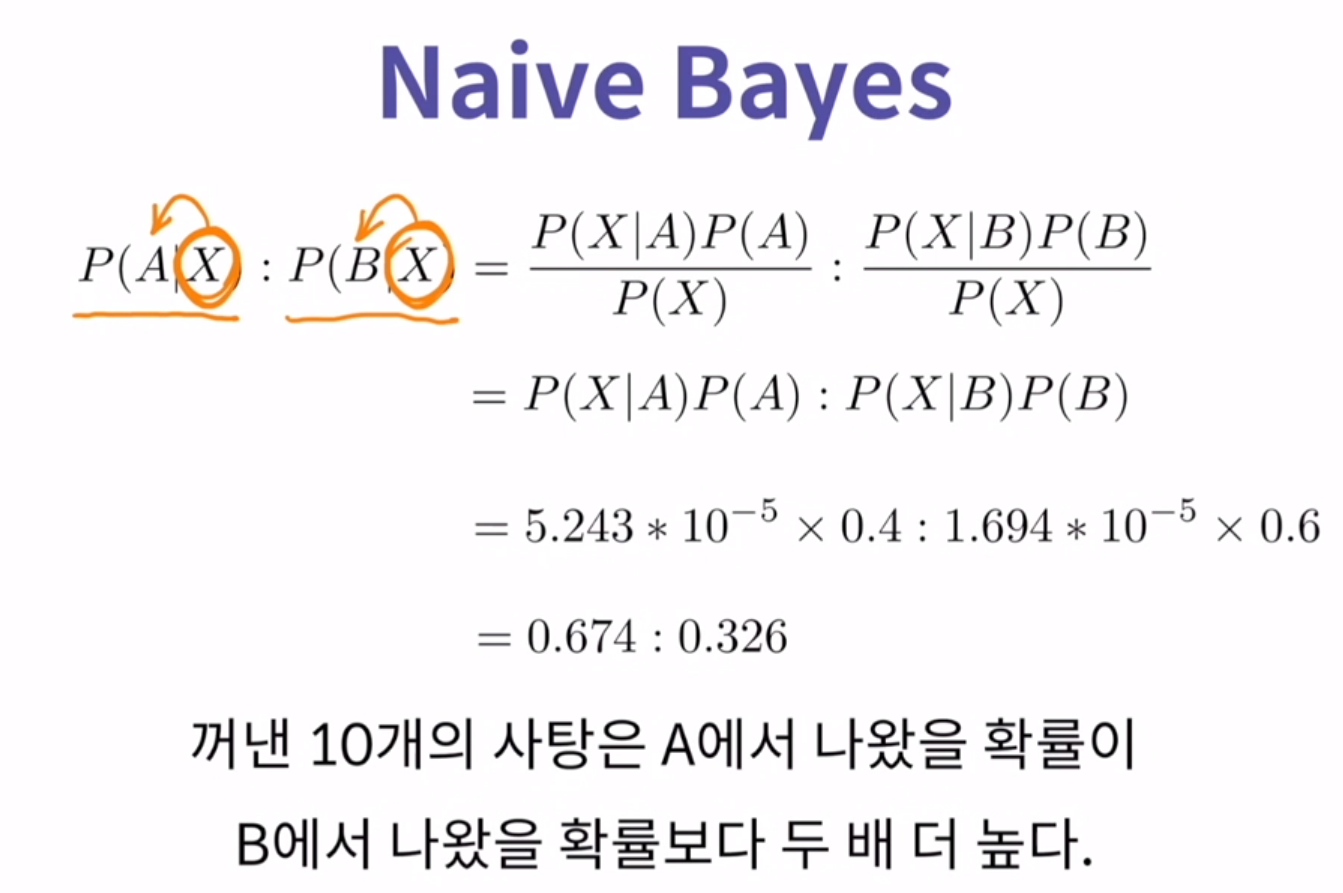


In [ ]:
import numpy as np

"""
1. "확인" 이라는 키워드가 등장했을 때 
    해당 메일이 스팸 메일인지 정상 메일인지
    판별하기 위한 함수를 구현합니다.
"""
def bayes_theorem():
    # 1. P(“스팸 메일”) 의 확률을 구하세요.
    p_spam = 8/20
    
    # 2. P(“확인” | “스팸 메일”) 의 확률을 구하세요.
    p_confirm_spam = 5/8
    
    # 3. P(“정상 메일”) 의 확률을 구하세요.
    p_ham = 12/20
    
    # 4. P(“확인” | "정상 메일" ) 의 확률을 구하세요.
    p_confirm_ham = 2/12
    
    # 5. P( "스팸 메일" | "확인" ) 의 확률을 구하세요.
    p_spam_confirm = 5/7
    
    # 6. P( "정상 메일" | "확인" ) 의 확률을 구하세요.
    p_ham_confirm = 2/7
    
    return p_spam_confirm, p_ham_confirm

def main():
    
    p_spam_confirm, p_ham_confirm = bayes_theorem()
    
    print("P(spam|confirm) = ",p_spam_confirm, "\nP(ham|confirm) = ",p_ham_confirm, "\n")
        
    # 두 값을 비교하여 확인 키워드가 스팸에 가까운지 정상 메일에 가까운지 확인합니다.
    value = [p_spam_confirm, p_ham_confirm]
    
    if p_spam_confirm > p_ham_confirm:
        print( round(value[0] * 100, 2), "% 의 확률로 스팸 메일에 가깝습니다.")
    else :
        print( round(value[1] * 100, 2), "% 의 확률로 일반 메일에 가깝습니다.")


if __name__ == "__main__":
    main()


## 가우시안 나이브 베이즈
 ‘가우시안’은 ‘데이터들의 분포가 평균값을 중심으로 대칭적인’이라는 뜻이다. 가우시안 나이브 베이즈 모델은 ‘확인’키워드 유무(O or X)와 같은 이산적 데이터가 아닌 연속적인 값(예를 들어 3.14…)을 가진 데이터에 적용할 수 있고 입력값 X의 개수를 다양하게 쓸 수 있다.

가우시안 나이브 베이즈를 위한 사이킷런 함수/라이브러리
- sklearn.naive_bayes.GaussianNB : 가우시안 나이브 베이즈 모델을 불러 옵니다.
- GaussianNB(): 가우시안 나이브 베이즈 모델을 정의합니다.
- [Model].fit(X, y): (X, y) 데이터셋에 대해서 모델을 학습시킵니다.
- [Model].predict(X): X 데이터를 바탕으로 예측되는 값을 반환합니다.

In [ ]:
from sklearn.datasets import load_wine

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

"""
1. 데이터를 불러오고, 
   불러온 데이터를 학습용, 테스트용 데이터로 
   분리하여 반환하는 함수를 구현합니다.
   
   Step01. 사이킷런에 저장되어 있는 데이터를 
           (X, y) 형태로 불러옵니다.
   
   Step02. 불러온 데이터를 
           학습용 데이터와 테스트용 데이터로 분리합니다.
           
           학습용 데이터 : 80%, 테스트용 데이터 : 20%, 
           
           일관된 결과 확인을 위해 random_state를 
           0 으로 설정합니다.
"""
def load_data():
    
    X, y = load_wine(return_X_y=True)
    
    print("데이터 확인해보기 :\n", X[:1])
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)
    
    return train_X, test_X, train_y, test_y
    
"""
2. 가우시안 나이브 베이즈 모델을 불러오고,
   학습을 진행한 후 테스트 데이터에 대한 
   예측값을 반환하는 함수를 구현합니다.
   
   Step01. 가우시안 나이브 베이즈 모델을 정의합니다.
   
   Step02. 학습용 데이터에 대해 모델을 학습시킵니다.
   
   Step03. 테스트 데이터에 대한 모델 예측을 수행합니다.
"""
def Gaussian_NB(train_X, test_X, train_y, test_y):
    
    model = GaussianNB()
    
    model.fit(train_X, train_y)
    
    predicted = model.predict(test_X)
    
    return predicted
    
# 데이터 불러오기, 모델 예측 결과를 확인할 수 있는 함수입니다.
def main():
    
    train_X, test_X, train_y, test_y = load_data()
    
    predicted = Gaussian_NB(train_X, test_X, train_y, test_y)
    
    ## 모델 정확도를 통해 분류 성능을 확인해봅니다.
    print("\nModel Accuracy : ")
    print(accuracy_score(test_y, predicted))

if __name__ == "__main__":
    main()


### 나이브 베이즈 분류기(사탕 기계)

In [4]:
import re
import math
import numpy as np

def main():
    M1 = {'r': 0.7, 'g': 0.2, 'b': 0.1} # M1 기계의 사탕 비율
    M2 = {'r': 0.3, 'g': 0.4, 'b': 0.3} # M2 기계의 사탕 비율
    
    test = {'r': 4, 'g': 3, 'b': 3}

    print(naive_bayes(M1, M2, test, 0.7, 0.3))

def naive_bayes(M1, M2, test, M1_prior, M2_prior):
    m1 = M1['r'] ** test['r'] * M1['g'] ** test['g'] * M1['b'] ** test['b'] * M1_prior
    m2 = M2['r'] ** test['r'] * M2['g'] ** test['g'] * M2['b'] ** test['b'] * M2_prior
    # 더해서 m1 + m2 = 1 이되게 정규화
    m1_normalized = m1 / (m1 + m2)
    m2_normalized = m2 / (m1 + m2)
    
    return [m1_normalized, m2_normalized]

if __name__ == "__main__":
    main()


[0.24254275200230901, 0.757457247997691]
